In [16]:

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\V Varunkumar\Desktop\Assignments\Data mining\DM 3\Grocery_Items_31.csv'  
data = pd.read_csv(file_path)
all_items = data.apply(pd.Series.explode).stack()
unique_items = all_items.unique()
item_counts = all_items.value_counts()
num_unique_items = len(unique_items)
num_records = len(data)
most_popular_item = item_counts.idxmax()
most_popular_count = item_counts.max()
print(f"Number of unique items: {num_unique_items}")
print(f"Number of records (transactions): {num_records}")
print(f"Most popular item: {most_popular_item}")
print(f"Number of transactions containing the most popular item: {most_popular_count}")


Number of unique items: 166
Number of records (transactions): 8000
Most popular item: whole milk
Number of transactions containing the most popular item: 1309


In [17]:

transactions = data.apply(lambda x: x.dropna().tolist(), axis=1).tolist()
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_data, columns=te.columns_)
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.08)
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Association Rules:
          antecedents         consequents   support  confidence      lift
0  (other vegetables)        (rolls/buns)  0.010750    0.084729  0.763325
1        (rolls/buns)  (other vegetables)  0.010750    0.096847  0.763325
2        (whole milk)  (other vegetables)  0.014750    0.096091  0.757369
3  (other vegetables)        (whole milk)  0.014750    0.116256  0.757369
4        (whole milk)        (rolls/buns)  0.015125    0.098534  0.887696
5        (rolls/buns)        (whole milk)  0.015125    0.136261  0.887696
6              (soda)        (whole milk)  0.010375    0.110226  0.718083
7            (yogurt)        (whole milk)  0.011000    0.127168  0.828454


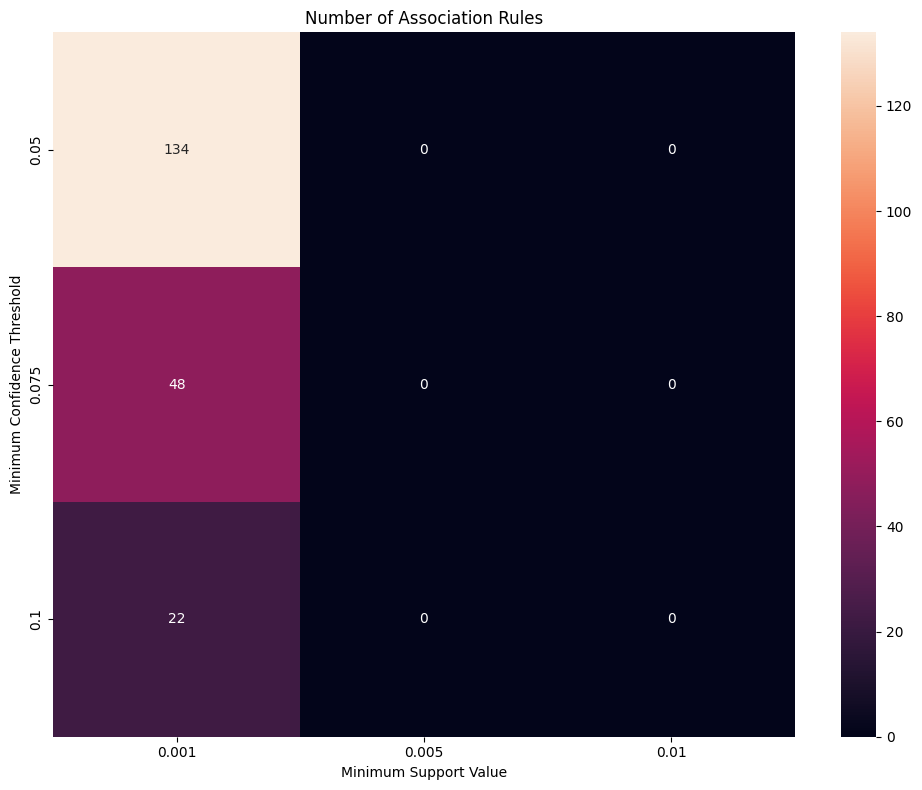

In [18]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", message=".*backend2gui.*")
data_encoded = pd.get_dummies(data)
msv_values = [0.001, 0.005, 0.01]
mct_values = [0.05, 0.075, 0.1]
rule_counts = np.zeros((len(mct_values), len(msv_values)))

for i, msv in enumerate(msv_values):
    frequent_itemsets = apriori(data_encoded, min_support=msv, use_colnames=True)
    for j, mct in enumerate(mct_values):
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct)
        rule_counts[j, i] = len(rules)

plt.figure(figsize=(10, 8))
sns.heatmap(rule_counts, annot=True, xticklabels=msv_values, yticklabels=mct_values, fmt='g')
plt.xlabel('Minimum Support Value')
plt.ylabel('Minimum Confidence Threshold')
plt.title('Number of Association Rules')
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


img_width, img_height = 64, 64  
batch_size = 32
num_classes = 4
epochs = 20  

dataset_dir = r'C:\Users\V Varunkumar\Desktop\Assignments\Data mining\DM 3\images'  
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0, 
    validation_split=0.2  
)
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  
    shuffle=True
)
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation', 
    shuffle=False
)
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax') 
])
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


Found 582 images belonging to 4 classes.
Found 144 images belonging to 4 classes.
Epoch 1/20
19/19 [==============================] - 4s 142ms/step - loss: 1.3913 - accuracy: 0.2680 - val_loss: 1.3804 - val_accuracy: 0.2917
Epoch 2/20
19/19 [==============================] - 2s 109ms/step - loss: 1.3766 - accuracy: 0.2715 - val_loss: 1.3721 - val_accuracy: 0.2778
Epoch 3/20
19/19 [==============================] - 2s 110ms/step - loss: 1.3659 - accuracy: 0.2835 - val_loss: 1.3569 - val_accuracy: 0.3264
Epoch 4/20
19/19 [==============================] - 2s 105ms/step - loss: 1.3443 - accuracy: 0.3299 - val_loss: 1.3316 - val_accuracy: 0.3333
Epoch 5/20
19/19 [==============================] - 2s 115ms/step - loss: 1.3091 - accuracy: 0.3711 - val_loss: 1.2927 - val_accuracy: 0.3750
Epoch 6/20
19/19 [==============================] - 2s 115ms/step - loss: 1.2764 - accuracy: 0.4003 - val_loss: 1.2673 - val_accuracy: 0.4375
Epoch 7/20
19/19 [==============================] - 2s 108ms/step 

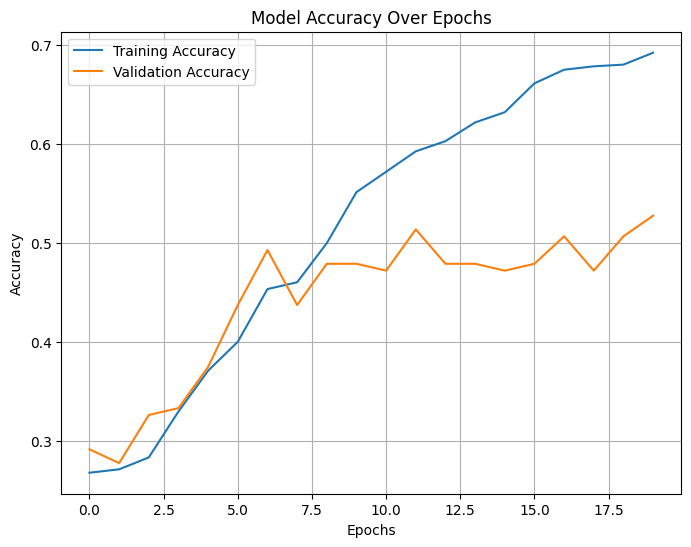

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Found 582 images belonging to 4 classes.
Found 144 images belonging to 4 classes.
Training CNN with filter size 5 × 5 in the second convolutional layer...
Epoch 1/20
19/19 [==============================] - 6s 211ms/step - loss: 1.3775 - accuracy: 0.2732 - val_loss: 1.3737 - val_accuracy: 0.2778
Epoch 2/20
19/19 [==============================] - 2s 129ms/step - loss: 1.3524 - accuracy: 0.3024 - val_loss: 1.3524 - val_accuracy: 0.3889
Epoch 3/20
19/19 [==============================] - 4s 193ms/step - loss: 1.3195 - accuracy: 0.4021 - val_loss: 1.3135 - val_accuracy: 0.4306
Epoch 4/20
19/19 [==============================] - 4s 198ms/step - loss: 1.2754 - accuracy: 0.4313 - val_loss: 1.2863 - val_accuracy: 0.4722
Epoch 5/20
19/19 [==============================] - 3s 171ms/step - loss: 1.2313 - accuracy: 0.4605 - val_loss: 1.2352 - val_accuracy: 0.4861
Epoch 6/20
19/19 [==============================] - 3s 187ms/step - loss: 1.1652 - accuracy: 0.4914 - val_loss: 1.2404 - val_accuracy: 

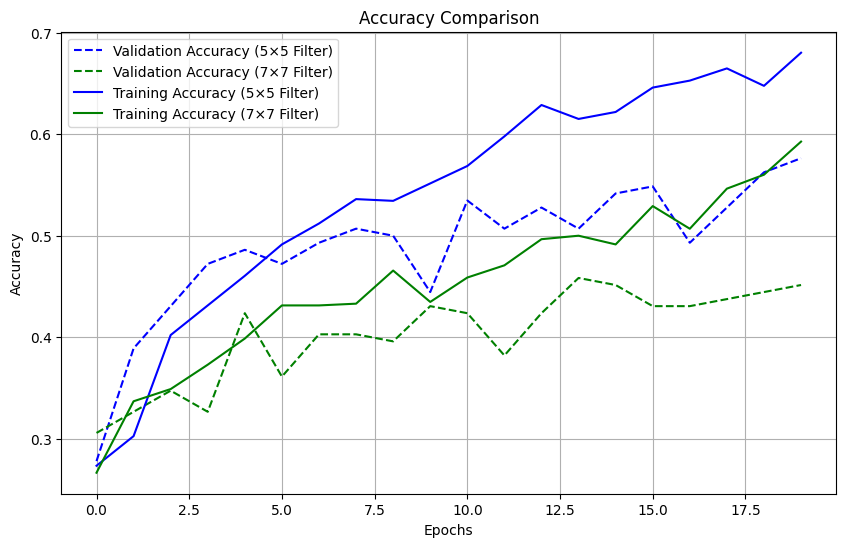

In [ ]:
#Banner ID 916501290
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
img_width, img_height = 64, 64
batch_size = 32
num_classes = 4
epochs = 20
datagen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

def train_cnn_with_filter(filter_size, epochs=20):
    print(f"Training CNN with filter size {filter_size} × {filter_size} in the second convolutional layer...")
    model = Sequential([
        Conv2D(8, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),  
        MaxPooling2D((2, 2)), 
        Conv2D(4, (filter_size, filter_size), activation='relu'),  
        MaxPooling2D((2, 2)),  
        Flatten(),  
        Dense(8, activation='relu'),  
        Dense(num_classes, activation='softmax')  
    ])
    
   
    model.compile(
        optimizer=Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
  
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator
    )
    
 
    val_loss, val_accuracy = model.evaluate(validation_generator)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    
    return history, model

history_5x5, model_5x5 = train_cnn_with_filter(filter_size=5, epochs=epochs)


history_7x7, model_7x7 = train_cnn_with_filter(filter_size=7, epochs=epochs)

plt.figure(figsize=(10, 6))
plt.plot(history_5x5.history['val_accuracy'], label='Validation Accuracy (5×5 Filter)', linestyle='--', color='blue')
plt.plot(history_7x7.history['val_accuracy'], label='Validation Accuracy (7×7 Filter)', linestyle='--', color='green')
plt.plot(history_5x5.history['accuracy'], label='Training Accuracy (5×5 Filter)', color='blue')
plt.plot(history_7x7.history['accuracy'], label='Training Accuracy (7×7 Filter)', color='green')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Describe and discuss what you observe by comparing the performance of the first model and the
other two models you constructed in (a), (b) or (c) (depending on which one you did). Comment
on whether the models are overfit, underfit, or just right.

First Model:
It is showing signs of overfitting with high training accuracy (~70%) but lower and fluctuating validation accuracy (~50%).

5×5 Filter Model:
It Performs better than the 7×7 model but exhibits overfitting as the training accuracy (~60%) significantly outpaces validation accuracy (~55%).

7×7 Filter Model:
It shows underfit with lower training accuracy (~55%) and closely matching validation accuracy, indicating it may be too simple to capture the data patterns.